<a href="https://colab.research.google.com/github/lenkaflorienkaa/pcvkganjil_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import glob

Masukkan nilai Gamma: 3


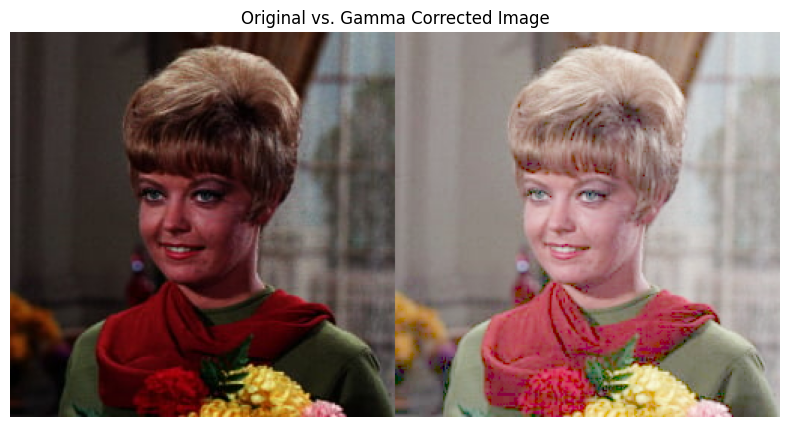

In [3]:
try:
  gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

def adjust_gamma(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

# Load the image
image_path = '/content/drive/MyDrive/PCVK/female.jpg'
image = cv.imread(image_path)

# Convert the image from BGR (OpenCV format) to RGB (for displaying correctly)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Apply gamma correction with user input (for example gamma = 3)
corrected_image = adjust_gamma(image_rgb, gamma=gamma)

# Plot original and gamma corrected images
final_frame = np.concatenate((image_rgb, corrected_image), axis=1)
plt.figure(figsize=(10, 5))
plt.imshow(final_frame)
plt.title('Original vs. Gamma Corrected Image')
plt.axis('off')

plt.show()

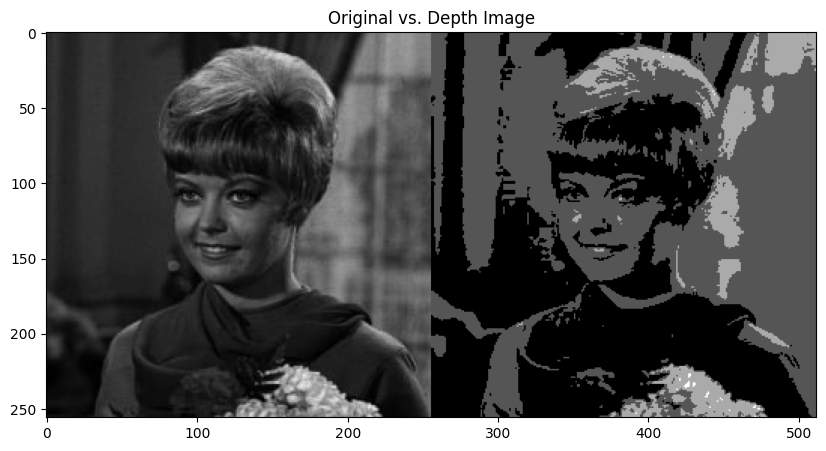

In [5]:
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)
original = cv.imread('/content/drive/MyDrive/PCVK/female.jpg', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

# Perform quantization
# Loop through each pixel to quantize
for i in range(original.shape[0]):  # height
    for j in range(original.shape[1]):  # width
        # Quantize the pixel value
        depth_image[i, j] = np.round(original[i, j] / level) * level

# Plotting original and depth image
final_frame = np.concatenate((original, depth_image), axis=1)
plt.figure(figsize=(10, 5))
plt.imshow(final_frame, cmap='gray')
plt.title('Original vs. Depth Image')
# plt.axis('off')

plt.show()

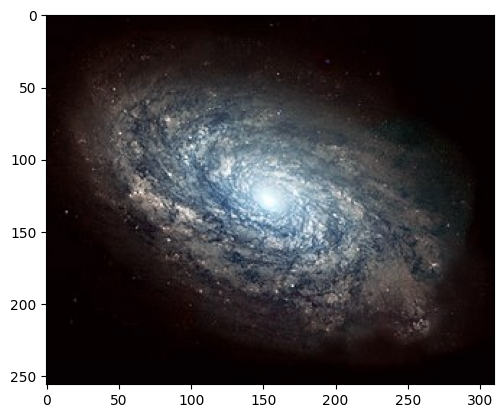

In [8]:
import glob

cv_img = []

for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

galaxy_ori = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg', cv.COLOR_BGR2RGB)
plt.imshow(galaxy_ori)

def pnsr(original, noise):
    mse = np.mean((original - noise) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def average_denoising(images, jumlah_citra):
    sum_image = np.zeros(images[0].shape, np.float64)
    for i in range(jumlah_citra):
        sum_image = sum_image + images[i]
    average_image = sum_image / jumlah_citra
    return np.clip(average_image, 0, 255).astype(np.uint8)

average_5 = average_denoising(cv_img, 5)
average_10 = average_denoising(cv_img, 10)
average_20 = average_denoising(cv_img, 20)
average_40 = average_denoising(cv_img, 40)
average_80 = average_denoising(cv_img, 80)
average_100 = average_denoising(cv_img, 100)

psnr_5 = pnsr(galaxy_ori, average_5)
psnr_10 = pnsr(galaxy_ori, average_10)
psnr_20 = pnsr(galaxy_ori, average_20)
psnr_40 = pnsr(galaxy_ori, average_40)
psnr_80 = pnsr(galaxy_ori, average_80)
psnr_100 = pnsr(galaxy_ori, average_100)

PSNR Average 5 Image:  27.544697279400964
PSNR Average 10 Image:  27.542358756990282
PSNR Average 20 Image:  27.522438276802458
PSNR Average 40 Image:  27.466385976316182
PSNR Average 80 Image:  27.397520310775377
PSNR Average 100 Image:  27.372288419845887


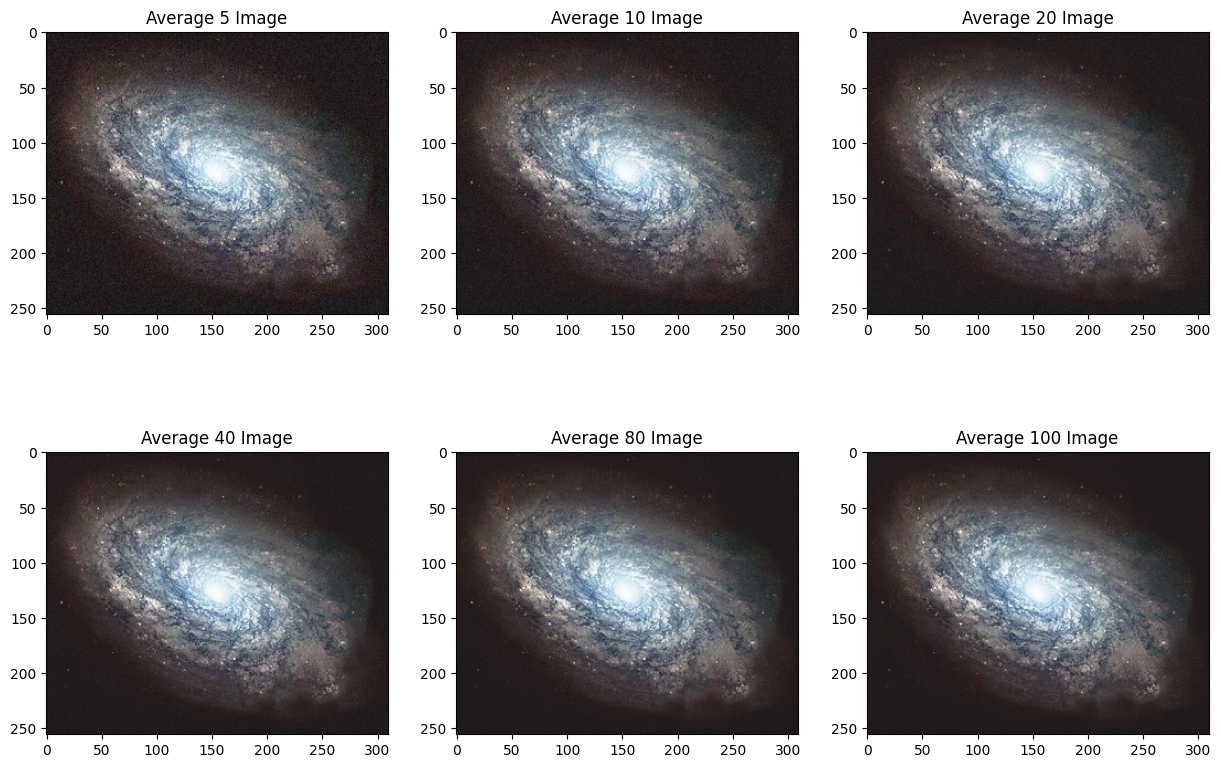

In [9]:
print('PSNR Average 5 Image: ', psnr_5)
print('PSNR Average 10 Image: ', psnr_10)
print('PSNR Average 20 Image: ', psnr_20)
print('PSNR Average 40 Image: ', psnr_40)
print('PSNR Average 80 Image: ', psnr_80)
print('PSNR Average 100 Image: ', psnr_100)

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].imshow(average_5)
ax[0, 0].set_title('Average 5 Image')

ax[0, 1].imshow(average_10)
ax[0, 1].set_title('Average 10 Image')

ax[0, 2].imshow(average_20)
ax[0, 2].set_title('Average 20 Image')

ax[1, 0].imshow(average_40)
ax[1, 0].set_title('Average 40 Image')

ax[1, 1].imshow(average_80)
ax[1, 1].set_title('Average 80 Image')

ax[1, 2].imshow(average_100)
ax[1, 2].set_title('Average 100 Image')

plt.show()


CONSLUSION :
The average denoising method is effective in reducing noise in images, especially when a sufficient number of images are averaged. However, beyond a certain point, the improvement in image quality becomes less significant, indicating diminishing returns. Therefore, it's crucial to strike a balance between the number of images averaged and the desired quality improvement.

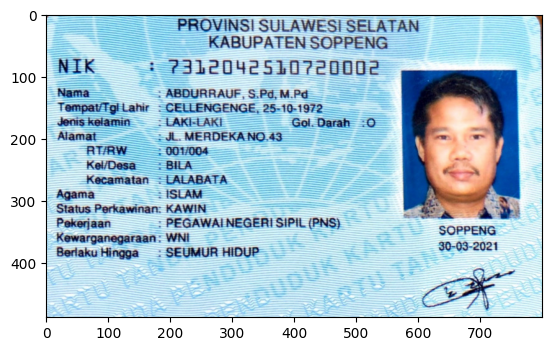

In [12]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/KTP2.jpeg')
ktp = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)
plt.imshow(ktp)

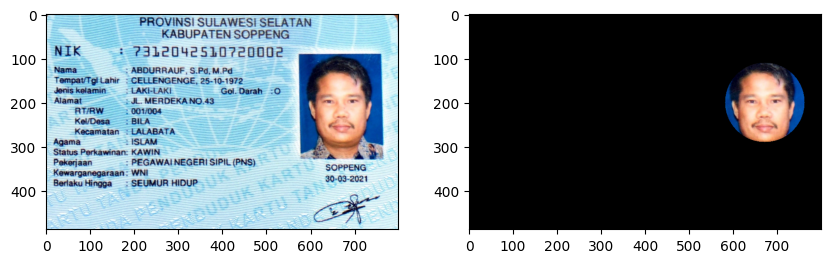

In [26]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 200), 90, 200, -1)
masked_image_face = cv.bitwise_and(ktp, ktp, mask=mask)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(ktp)
ax[1].imshow(masked_image_face)

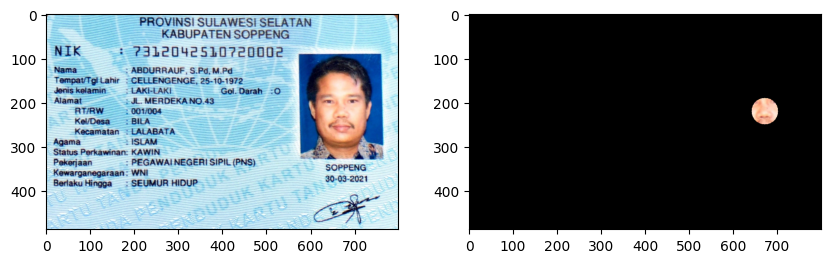

In [25]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 220), 30, 200, -1)
masked_image_nose = cv.bitwise_and(ktp, ktp, mask=mask)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(ktp)
ax[1].imshow(masked_image_nose)

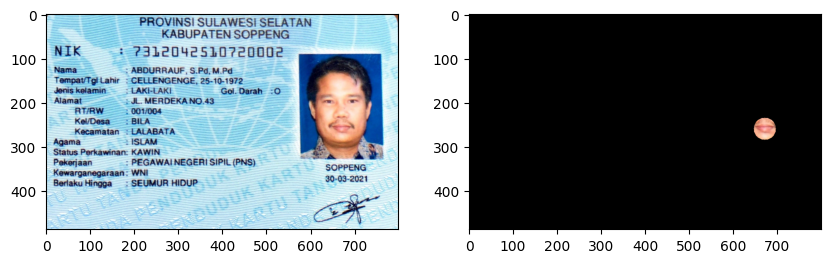

In [24]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 260), 25, 200, -1)
masked_image_mouth = cv.bitwise_and(ktp, ktp, mask=mask)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(ktp)
ax[1].imshow(masked_image_mouth)

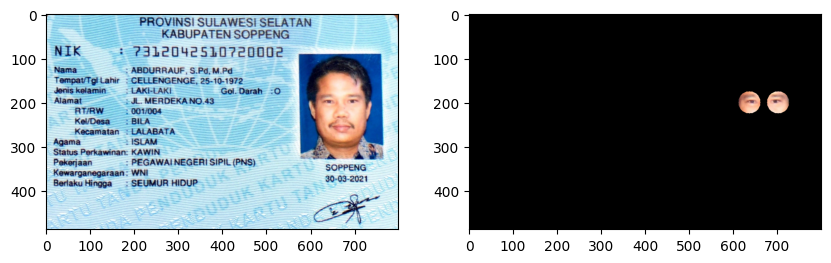

In [27]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (635, 200), 25, 200, -1)
cv.circle(mask, (700, 200), 25, 200, -1)
masked_image_eye = cv.bitwise_and(ktp, ktp, mask=mask)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(ktp)
ax[1].imshow(masked_image_eye)

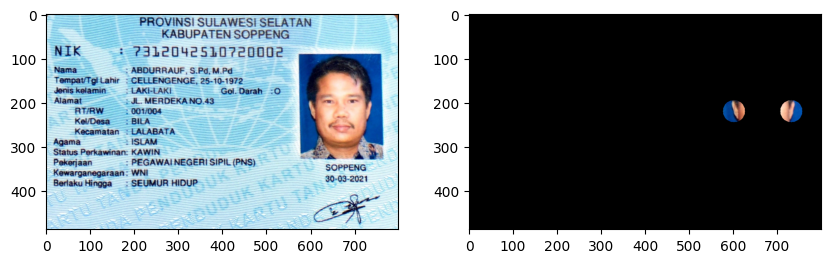

In [23]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (600, 220), 25, 200, -1)
cv.circle(mask, (730, 220), 25, 200, -1)
masked_image_ears = cv.bitwise_and(ktp, ktp, mask=mask)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(ktp)
ax[1].imshow(masked_image_ears)

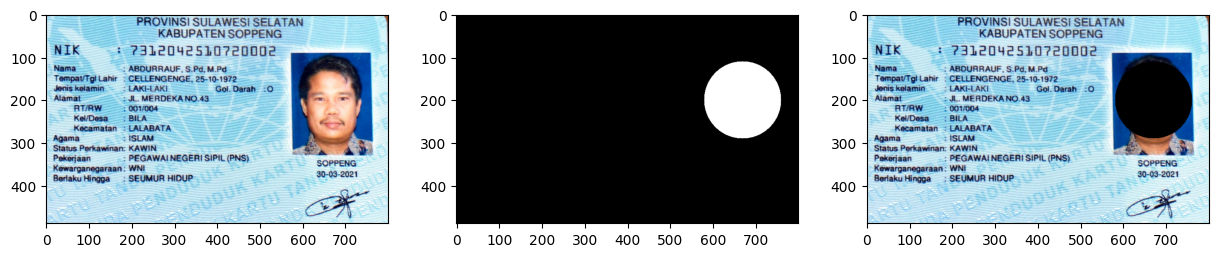

In [22]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 200), 90, 255, -1)

mask_not = cv.bitwise_not(mask)
masked_image_not_face = cv.bitwise_and(ktp, ktp, mask=mask_not)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(ktp)
ax[1].imshow(mask, cmap='gray')
ax[2].imshow(masked_image_not_face)

plt.show()

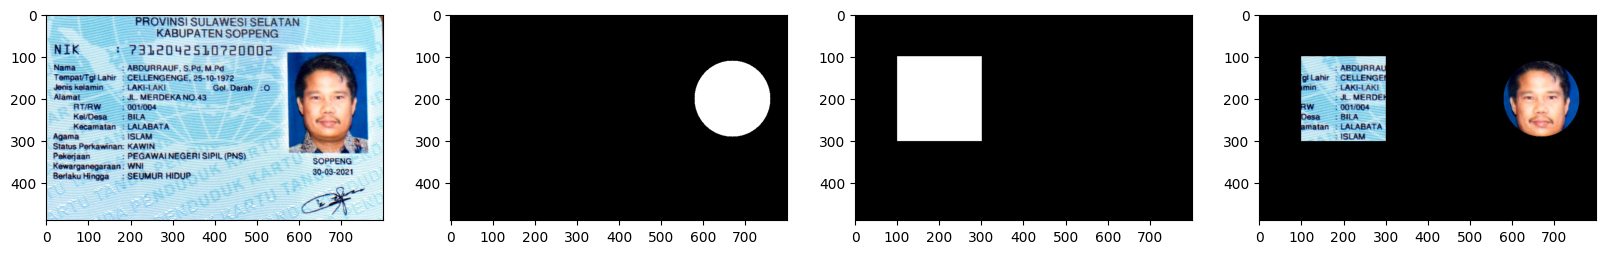

In [21]:
# Membuat mask lingkaran untuk wajah
mask_face = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask_face, (670, 200), 90, 255, -1)  # Masking wajah (sesuaikan posisi dan ukuran lingkaran)

# Membuat mask persegi panjang di bagian lain gambar
mask_rectangle = np.zeros(ktp.shape[:2], dtype="uint8")
cv.rectangle(mask_rectangle, (100, 100), (300, 300), 255, -1)  # Masking area lain (sesuaikan)

# Menggabungkan dua mask menggunakan operator OR
mask_combined = cv.bitwise_or(mask_face, mask_rectangle)

# Menerapkan mask gabungan ke gambar asli
masked_image = cv.bitwise_and(ktp, ktp, mask=mask_combined)

# Menampilkan hasil
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(ktp)
ax[1].imshow(mask_face, cmap='gray')
ax[2].imshow(mask_rectangle, cmap='gray')
ax[3].imshow(masked_image)

plt.show()

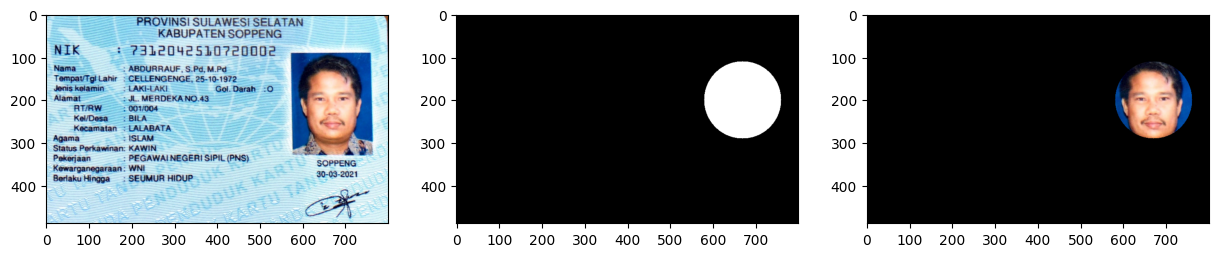

In [28]:

# Membuat mask lingkaran untuk wajah
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 200), 90, 255, -1)  # Masking wajah (sesuaikan posisi dan ukuran lingkaran)

# Menerapkan mask pada gambar menggunakan operator AND
masked_image = cv.bitwise_and(ktp, ktp, mask=mask)

# Menampilkan hasil
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(ktp)
ax[1].imshow(mask, cmap='gray')
ax[2].imshow(masked_image)
plt.show()

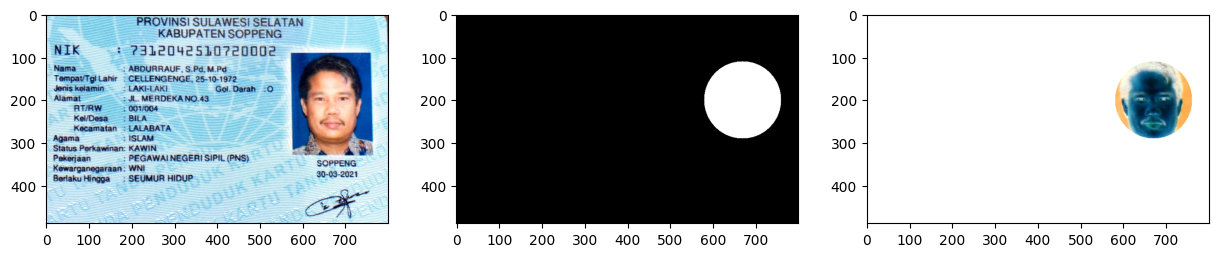

In [29]:
# Membuat mask lingkaran untuk wajah
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 200), 90, 255, -1)  # Masking wajah (sesuaikan posisi dan ukuran lingkaran)

# Menerapkan AND pada gambar (masking wajah)
masked_image = cv.bitwise_and(ktp, ktp, mask=mask)

# Membalik hasil AND dengan operator NOT (NAND)
nand_masked_image = cv.bitwise_not(masked_image)

# Menampilkan hasil
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(ktp)
ax[1].imshow(mask, cmap='gray')
ax[2].imshow(nand_masked_image)
plt.show()

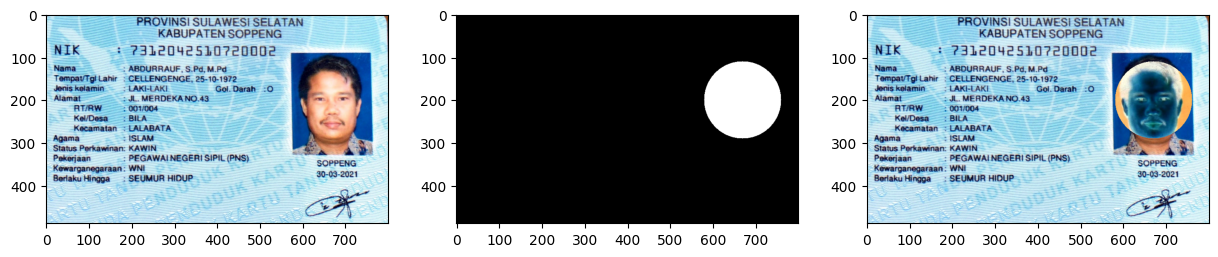

In [30]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 200), 90, 255, -1)  # Masking wajah (sesuaikan posisi dan ukuran lingkaran)

# Mengubah mask menjadi tiga channel
mask_colored = cv.merge([mask, mask, mask])  # Mengulang mask ke tiga channel

# Melakukan operasi XOR antara gambar dan mask
xor_masked_image = cv.bitwise_xor(ktp, mask_colored)

# Menampilkan hasil
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(ktp)
ax[1].imshow(mask, cmap='gray')
ax[2].imshow(xor_masked_image)
plt.show()


RESULT :

In digital image processing, logical operations play a crucial role in manipulating and comparing pixel values across images. These operations, such as NOT, AND, OR, NAND, and XOR, allow for various effects and comparisons that can enhance, invert, or highlight differences in images. Below is an explanation of how each operator functions and its practical use in image processing:

AND Function: The AND operator compares the pixel values of two images and only returns the same pixel value if both pixels are non-zero. If either pixel is 0, the result will also be 0, effectively masking differences where zero pixels are involved.

OR Function: The OR operator returns a non-zero pixel if at least one of the two input pixels is non-zero. This ensures that no significant information is lost between two images, even if one contains areas of non-zero pixels.

NOT Function: The NOT operator inverts the pixel values in an image, turning black (0) pixels into white (255) and white into black. This operation creates a negative image and is often used for contrast reversal.

NAND Function: The NAND operator is the inverse of the AND function. It outputs 1 in all cases except when both pixels are 1, making it useful for eliminating common features between two images.

XOR Function: The XOR operator highlights differences between two images. It returns 1 when the pixels differ (one is 1 and the other is 0) and 0 when the pixels are the same. This is valuable for detecting changes or unique features in image comparison.